# outFLANK
Perform outFLANK via `R::dartR`

In [2]:
library("dartR")
library("ggplot2")
library("dplyr")

In [3]:
infile <- "../../inputfiles/bft.kinless.gen"
pop_names <- c("BRZ","BRZSP","KEY", "MRT", "PNS", "PR", "SCA", "TX", "VZ")
full_dataset <- import2genind(infile, ncode = 3L, quiet = T)
popNames(full_dataset) <- pop_names

## Run outFLANK

Calculating FSTs, may take a few minutes...


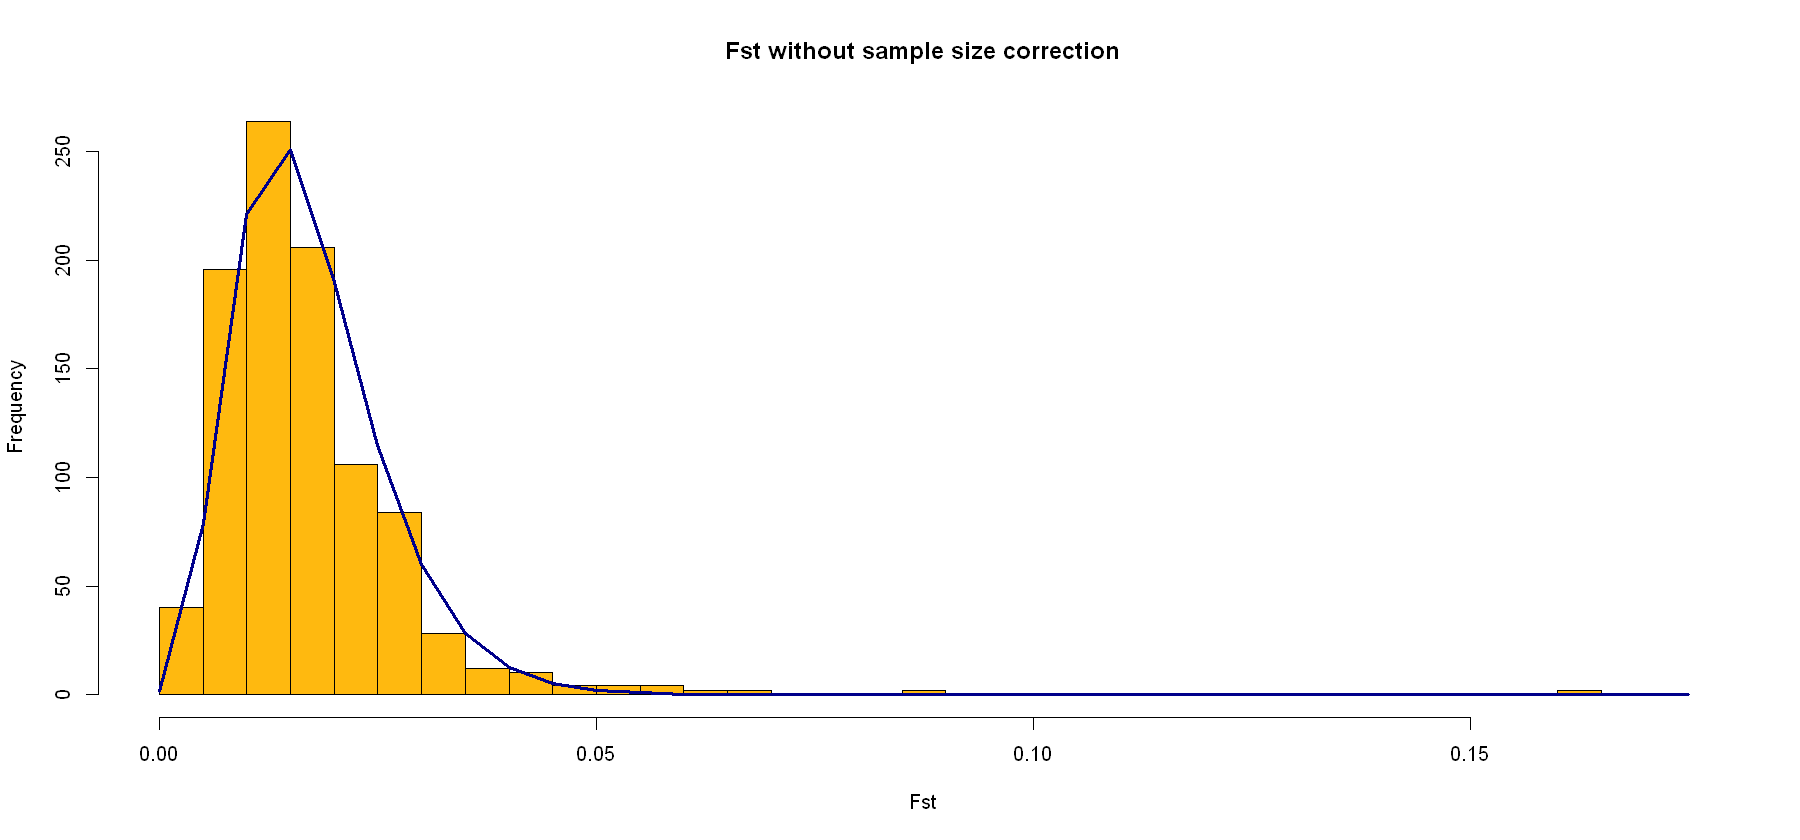

In [12]:
options(repr.plot.width=15, repr.plot.height=7)
full_outflnk <- gl.outflank(
    full_dataset, 
    Hmin= 0.01, 
    qthreshold = 0.05, 
    LeftTrimFraction = 0.05,
    RightTrimFraction = 0.05
)

## Post processing

In [13]:
full_outflnk <- full_outflnk$outflank$results

Remove duplicated rows for each SNP

In [14]:
toRemove <- seq(1, nrow(full_outflnk), by=2)
full_outflnk <- full_outflnk[-toRemove, ]
head(full_outflnk)

,LocusName,He,FST,T1,T2,FSTNoCorr,T1NoCorr,T2NoCorr,meanAlleleFreq,indexOrder,GoodH,qvalues,pvalues,pvaluesRightTail,OutlierFlag
,<chr>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<dbl>,<int>,<chr>,<dbl>,<dbl>,<dbl>,<lgl>
2,232_pilon_2036.002,0.04067103,0.003074769,6.264862e-05,0.02037507,0.01730567,0.0003526827,0.020379603,0.9792332,2,goodH,0.9657977,0.75585948,0.37792974,FALSE
4,335_pilon_972.003,0.03332376,0.015943825,2.667140e-04,0.01672836,0.03389610,0.0005671991,0.016733462,0.9830508,4,goodH,0.4492137,0.05237135,0.02618568,FALSE
6,335_pilon_973.003,0.02344729,0.003532902,4.152652e-05,0.01175422,0.02326294,0.0002735294,0.011758163,0.9881356,6,goodH,0.8798950,0.32699336,0.16349668,FALSE
8,341_pilon_1400.004,0.07420274,0.012091845,4.501394e-04,0.03722670,0.02922048,0.0010880328,0.037235284,0.9614094,8,goodH,0.6469499,0.12215558,0.06107779,FALSE
10,536_pilon_3491.002,0.01947863,0.008973181,8.762993e-05,0.00976576,0.02355731,0.0002301024,0.009767771,0.9901639,10,goodH,0.8725100,0.31240308,0.15620154,FALSE
12,794_pilon_11572.001,0.03760373,-0.001514511,-2.851505e-05,0.01882789,0.01288391,0.0002426355,0.018832445,0.9808307,12,goodH,0.9657977,0.76927943,0.61536028,FALSE


Find which markers are putative outliers

In [15]:
out_index <- which(full_outflnk$OutlierFlag==TRUE)
outflank_names <- locNames(full_dataset)[out_index]
length(outflank_names)
head(outflank_names)

[1] 55

[1] "22845_pilon_21316"  "25280_pilon_7009"   "38948_pilon_27399" 
[4] "41950_pilon_50866"  "43953_pilon_6455"   "49150_pilon_108095"

In [16]:
write.csv(full_outflnk, file = "outflank.csv", row.names = FALSE)
write.table(outflank_names, file = "outflank.outliers.loci", row.names = F, col.names = F, quote = F)

## Plots

In [17]:
mycolors <- c("#bbbbbb", "#4095b5", "#8a556e", "#f4cf30")

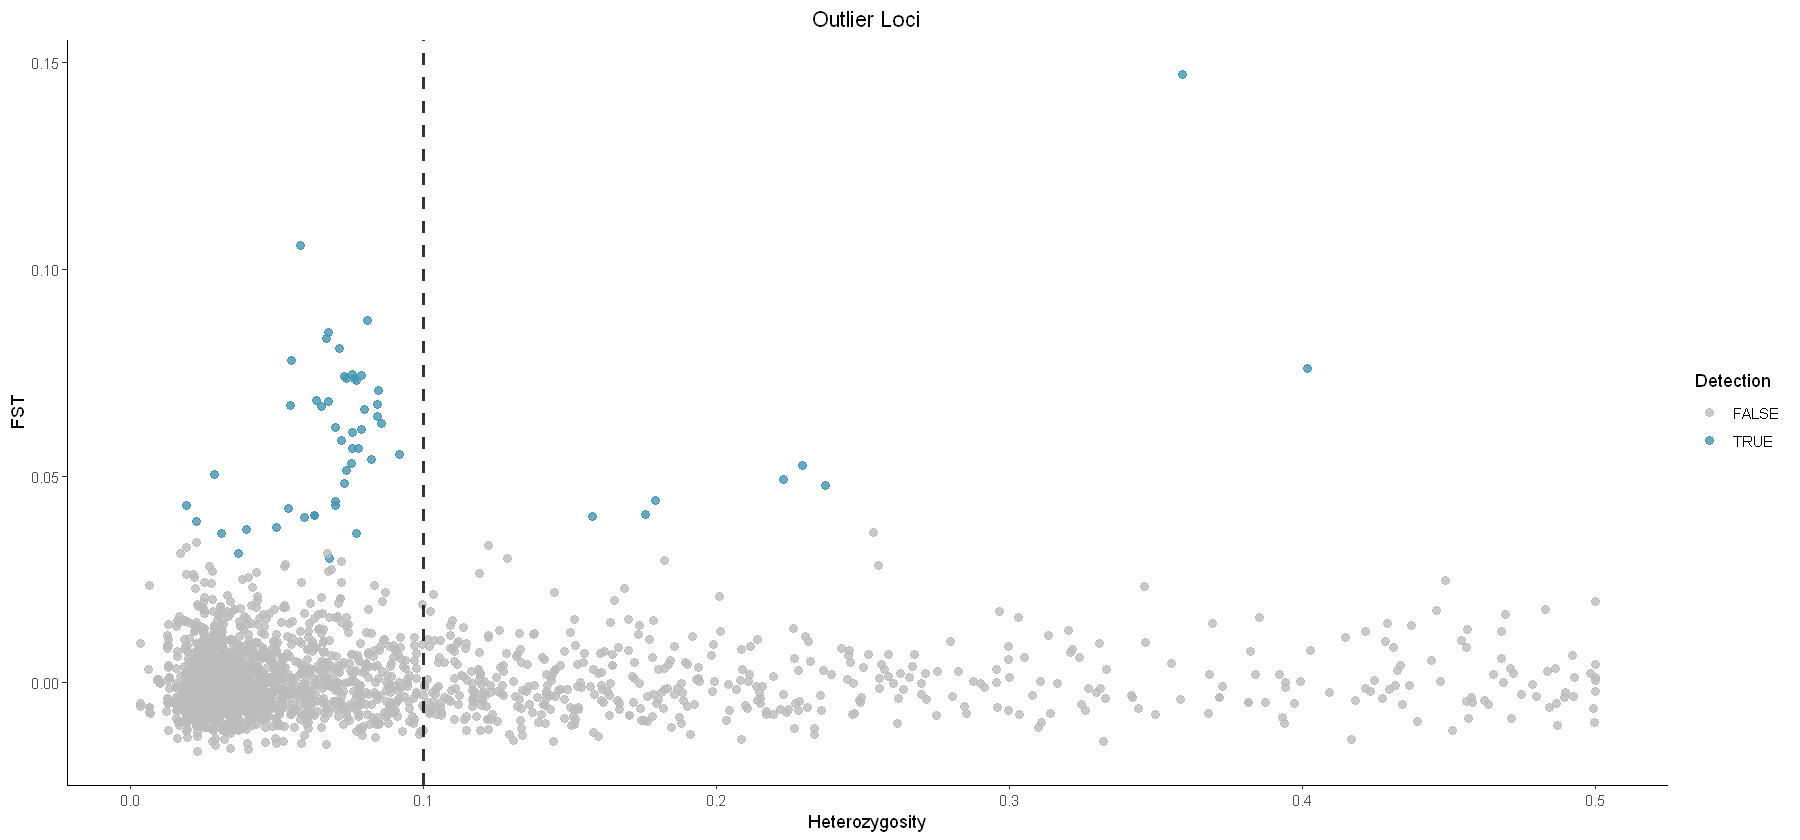

In [18]:
options(repr.plot.width=15, repr.plot.height=7)
ggplot(data = full_outflnk, x = He, y = FST) + 
  theme_classic() +
  geom_point(aes(x = He, y = FST, col = OutlierFlag), alpha = 0.8,  size = 2.1) + 
  geom_vline(xintercept = 0.1, alpha = 0.8, linetype = "dashed", size = 1) +
  labs(x = "Heterozygosity", y = "FST", color = "Detection") +
  scale_color_manual(values = mycolors[1:2]) +
  ggtitle("Outlier Loci") +
  theme(plot.title = element_text(hjust = 0.5))